<a href="https://colab.research.google.com/github/AnukaMithara/Food-Demand-Forecasting-Data-Mining-Project/blob/main/EC9560_LAB03_2019E054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EC 9560: DATA MINING**
# **MINI GROUP PROJECT**



### KARUNANAYAKA D.W.A.M.
### 2019/E/054


### *Note: Lab 03 progress can be found below*

*Link to the colab file: https://colab.research.google.com/drive/1eLFnUu4__-PUrWCZhzyaewMi0bFus6Qk?usp=sharing*

# **LAB 01**
### 22 SEPTEMBER 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the training data from a CSV file into a DataFrame
train = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/train.csv')

# Read the fulfilment center information from a CSV file into a DataFrame
fulfilment_center_info = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/fulfilment_center_info.csv')

# Read the meal information from a CSV file into a DataFrame
meal_info = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/meal_info.csv')

# Read the testing data from a CSV file into a DataFrame
test = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/test_QoiMO9B.csv')

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
print('Shape of the train set = ',train.shape)
print('Shape of the fulfilment center information set = ',fulfilment_center_info.shape)
print('Shape of the meal information set = ',meal_info.shape)

Shape of the train set =  (456548, 9)
Shape of the fulfilment center information set =  (77, 5)
Shape of the meal information set =  (51, 3)


In [8]:
print("Count of Unique center_ids in Train Dataset:", train['center_id'].nunique())
print("Count of Unique meal_ids in Train Dataset:", train['meal_id'].nunique())


Count of Unique center_ids in Train Dataset: 77
Count of Unique meal_ids in Train Dataset: 51


In [9]:
# Checking Null values

print('Total Null values for the train datset = ',train.isnull().sum().sum())
print('Total Null values for the fulfilment center information datset = ',fulfilment_center_info.isnull().sum().sum())
print('Total Null values for the meal information datset = ',meal_info.isnull().sum().sum())


Total Null values for the train datset =  0
Total Null values for the fulfilment center information datset =  0
Total Null values for the meal information datset =  0


In [10]:
#Combining datasets

# train = pd.merge(train,fulfilment_center_info, on='center_id')
# test = pd.merge(test,fulfilment_center_info, on='center_id')

# train = pd.merge(train,meal_info, on='meal_id')
# test = pd.merge(test,meal_info, on='meal_id')

In [11]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [12]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [13]:
train.isnull().sum().sum()

0

In [14]:
test.isnull().sum().sum()

0

In [15]:
train.shape

(456548, 9)

In [16]:
test.shape

(32573, 8)

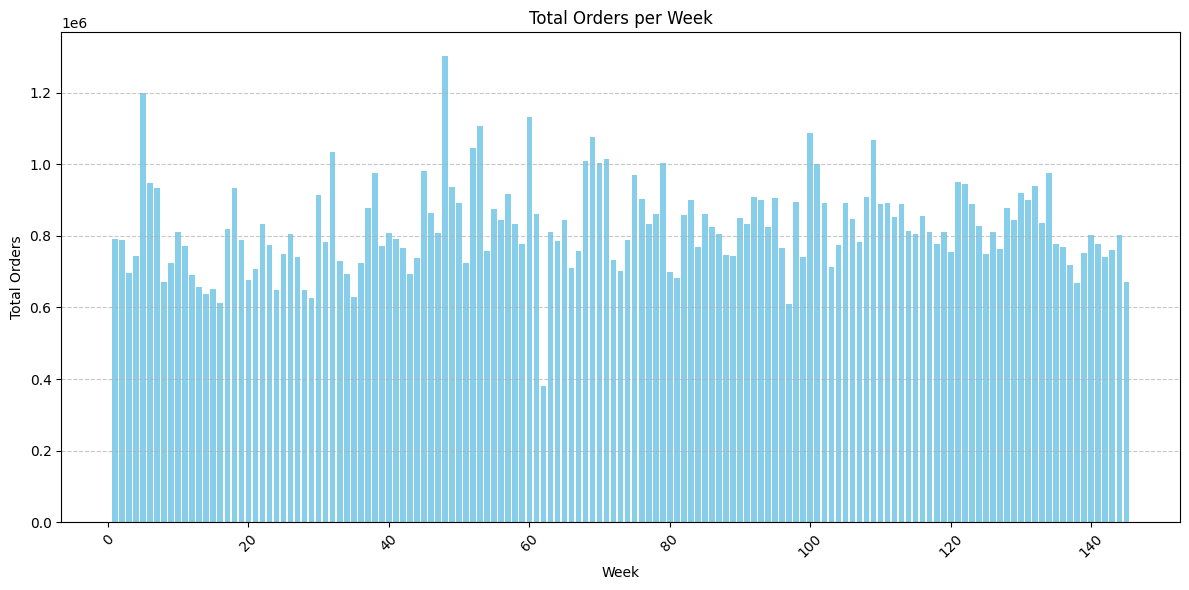

In [17]:
# Group the data by 'week' and calculate the total number of orders for each week
weekly_orders = train.groupby('week')['num_orders'].sum()

# Extract the weeks and total orders
weeks = weekly_orders.index
total_orders = weekly_orders.values

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(weeks, total_orders, color='skyblue')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.title('Total Orders per Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **LAB 02**

### 10 OCTOBER 2023


In [18]:
promotions_applied_df = train[train['emailer_for_promotion'] == 1]
meal_count = promotions_applied_df['meal_id'].count()
print('Promotion voucher meals count:', meal_count)


Promotion voucher meals count: 37050


In [19]:
promotions_applied_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
14,1378227,1,55,1109,264.84,297.79,1,0,756
20,1044821,1,55,1971,259.99,320.13,1,1,798
24,1338119,1,55,1558,583.03,610.13,1,0,162
25,1188372,1,55,2581,583.03,612.13,1,0,312
26,1440008,1,55,1962,582.03,612.13,1,0,231
...,...,...,...,...,...,...,...,...,...
456434,1411039,145,68,2306,242.53,335.62,1,0,15
456478,1151893,145,51,2306,244.50,337.62,1,0,80
456513,1261448,145,61,1778,150.41,157.14,1,0,271
456514,1071621,145,61,1062,159.08,153.26,1,0,378


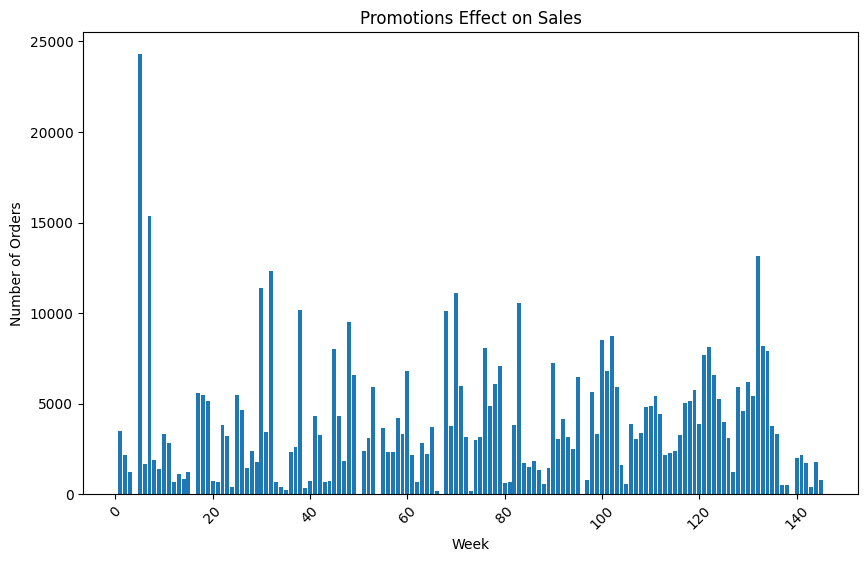

In [20]:

plt.figure(figsize=(10, 6))
plt.bar(promotions_applied_df['week'], promotions_applied_df['num_orders'])
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.title('Promotions Effect on Sales')
plt.xticks(rotation=45)
plt.show()


In [21]:
homepage_featured_df = train[train['homepage_featured'] == 1]
meal_count = homepage_featured_df['meal_id'].count()
print('Promotion voucher meals count:', meal_count)


Promotion voucher meals count: 49855


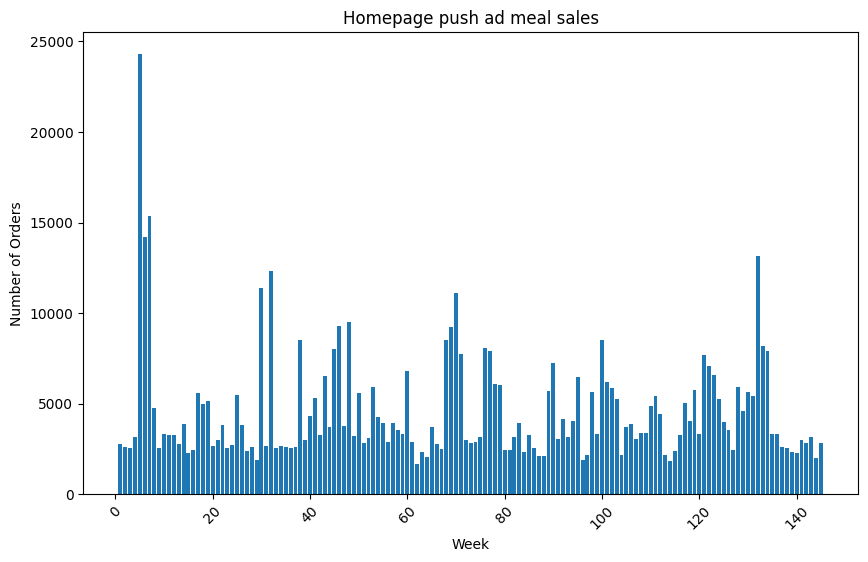

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(homepage_featured_df['week'], homepage_featured_df['num_orders'])
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.title('Homepage push ad meal sales')
plt.xticks(rotation=45)
plt.show()

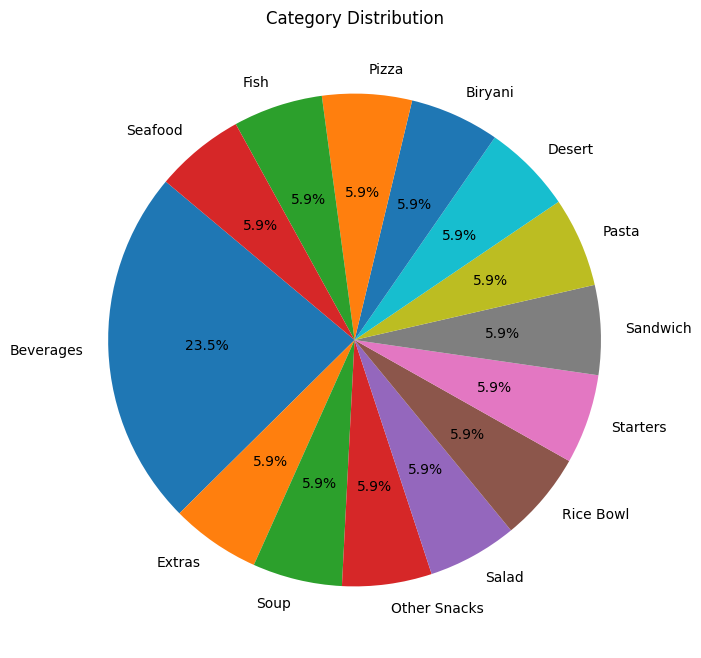

In [23]:
category_counts = meal_info['category'].value_counts()
categories = meal_info['category'].unique()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=140)

plt.title('Category Distribution')

plt.show()


## Split Data

In [24]:
X=train.drop(["num_orders"],axis=1)
y=train["num_orders"]

### Split the dataset into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

### Feature selection

In [26]:
x_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
141016,1473139,48,81,2139,277.45,277.45,0,0
406574,1220479,130,143,1216,414.25,413.25,0,0
189872,1186734,64,146,2581,457.90,639.23,1,0
323934,1209372,105,73,1770,411.28,486.03,0,0
142275,1467845,48,23,2867,620.86,620.86,0,0
...,...,...,...,...,...,...,...,...
152315,1290260,52,149,1971,276.45,310.43,0,0
439107,1305422,140,67,2760,243.53,243.53,0,0
117952,1281568,41,109,1311,164.93,163.93,0,0
435829,1035207,139,174,1198,206.61,208.61,0,0


### Mutual information as the Feature selection method

In [27]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(x_train, y_train)

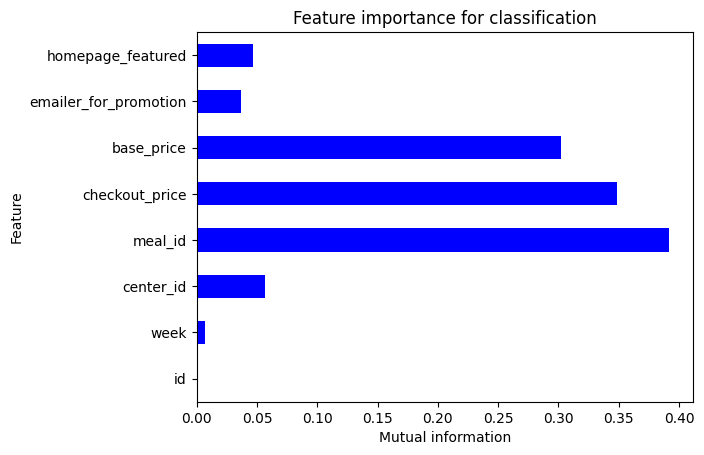

In [28]:
featureimp = pd.Series(importances)
featureimp.index = x_train.columns
featureimp.plot(kind='barh', color='b')

plt.xlabel("Mutual information")
plt.ylabel("Feature")
plt.title("Feature importance for classification")
plt.show()

# **LAB 03**

### 10 NOVEMBER 2023


### Feature allocation

Rank the features

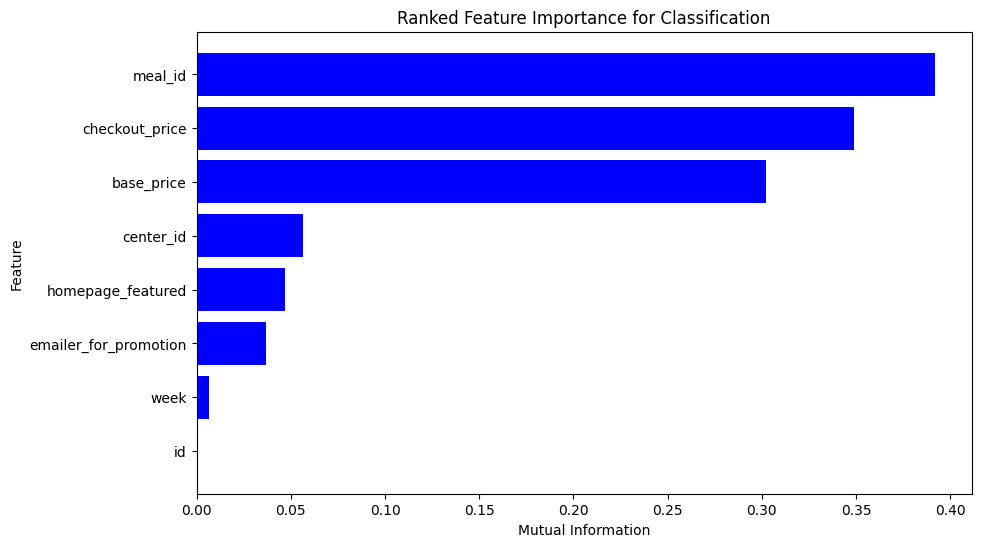

In [29]:
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

feature_importances.reset_index(drop=True, inplace=True)

# Plot the importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='b')
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.title("Ranked Feature Importance for Classification")
plt.show()

### Drop the week and id Attributes that got low MI-Score

In [30]:
X_New=train.drop(["num_orders",'id','week'],axis=1)
y_New=train["num_orders"]

In [31]:
x_train_New, x_test_New, y_train_New, y_test_New= train_test_split(X_New, y_New, test_size= 0.2, random_state=0)

In [32]:
x_train_New

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
141016,81,2139,277.45,277.45,0,0
406574,143,1216,414.25,413.25,0,0
189872,146,2581,457.90,639.23,1,0
323934,73,1770,411.28,486.03,0,0
142275,23,2867,620.86,620.86,0,0
...,...,...,...,...,...,...
152315,149,1971,276.45,310.43,0,0
439107,67,2760,243.53,243.53,0,0
117952,109,1311,164.93,163.93,0,0
435829,174,1198,206.61,208.61,0,0


In [33]:
x_test_New

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
242838,104,1878,292.03,291.03,0,1
314826,29,1993,121.31,119.31,0,0
57041,65,1525,282.33,282.33,0,0
87123,132,1803,197.94,197.94,0,0
154611,39,2139,303.64,302.64,0,0
...,...,...,...,...,...,...
231834,149,2760,195.00,243.53,0,0
161380,24,2581,484.03,679.03,1,1
173848,55,2707,226.01,226.01,0,0
243709,43,1971,195.03,290.03,0,0


## Train the models

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import r2_score,mean_squared_log_error
from math import sqrt

#### Linear Regression

In [35]:
LinearRegressionModel= LinearRegression()
LinearRegressionModel.fit(x_train_New,y_train_New)

Linearreg = LinearRegressionModel.predict(x_test_New)

# Replace negative predictions with 0.1
Linearreg[Linearreg < 0] = 0.1

# Calculate the RMSLE
linear_rmsle = sqrt(mean_squared_log_error(y_test_New, Linearreg))
print("RMSLE for LinearRegression: ", linear_rmsle)


RMSLE for LinearRegression:  1.536508289650564


### Decision Tree

In [36]:
DecisionTreeRegressorModel = DecisionTreeRegressor(random_state=0)
DecisionTreeRegressorModel.fit(x_train_New, y_train_New)

dt_pred = DecisionTreeRegressorModel.predict(x_test_New)

# Calculate the RMSLE
dtr_rmsle = sqrt(mean_squared_log_error(y_test_New, dt_pred))
print("RMSLE for Decision Tree Regression: ", dtr_rmsle)


RMSLE for Decision Tree Regression:  0.6376131725990689


### Random Forest

In [37]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, random_state=0)
RandomForestRegressorModel.fit(x_train_New, y_train_New)

rf_pred = RandomForestRegressorModel.predict(x_test_New)

# Calculate the RMSLE
rfr_rmsle = sqrt(mean_squared_log_error(y_test_New, rf_pred))
print("RMSLE for Random Forest Regression: ", rfr_rmsle)


RMSLE for Random Forest Regression:  0.5483945140949386


### ARIMA

In [38]:
arimaModel = ARIMA(y_train_New, order=(5,1,0))

model_fit = arimaModel.fit()

arima_pred = model_fit.predict(start=len(x_train_New), end=len(x_train_New)+len(x_test_New)-1)

# Calculate the RMSLE
arima_rmsle = sqrt(mean_squared_log_error(y_test_New, arima_pred))
print("RMSLE for ARIMA: ", arima_rmsle)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSLE for ARIMA:  1.8542271231647598


## Model Testing for Unseen Data

In [39]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [40]:
test_New=test.drop(['id','week'],axis=1)
test_New.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,55,1885,158.11,159.11,0,0
1,55,1993,160.11,159.11,0,0
2,55,2539,157.14,159.14,0,0
3,55,2631,162.02,162.02,0,0
4,55,1248,163.93,163.93,0,0


In [41]:
test.shape

(32573, 8)

In [42]:
test_New.shape

(32573, 6)

### Linear Regression Model

In [43]:
LinearregPred = LinearRegressionModel.predict(test_New)
LinearregPred[LinearregPred < 0] = 0.1
LinearregPred

array([348.58105687, 348.4985586 , 352.33794069, ..., 235.00508191,
       234.50369603, 266.40934293])

In [44]:
LinearregPred.shape

(32573,)

In [46]:
import numpy as np

lrp = {"id": test["id"], "num_orders":np.rint(LinearregPred).astype(int) }
lrpdf = pd.DataFrame(lrp)
lrpdf

,id,num_orders
0,1028232,349
1,1127204,348
2,1212707,352
3,1082698,350
4,1400926,342
...,...,...
32568,1250239,117
32569,1039516,121
32570,1158107,235
32571,1444235,235


In [47]:
lrpdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/LinearRegression.csv', index = False)

### Decision Tree Model

In [48]:
DecisionTreeRegressorPred = DecisionTreeRegressorModel.predict(test_New)
DecisionTreeRegressorPred[DecisionTreeRegressorPred < 0] = 0.1
DecisionTreeRegressorPred

array([188., 324., 135., ..., 391., 190., 215.])

In [49]:
DecisionTreeRegressorPred.shape

(32573,)

In [50]:
dtr = {"id": test["id"], "num_orders":np.rint(DecisionTreeRegressorPred).astype(int) }
dtrdf = pd.DataFrame(dtr)
dtrdf

,id,num_orders
0,1028232,188
1,1127204,324
2,1212707,135
3,1082698,41
4,1400926,69
...,...,...
32568,1250239,76
32569,1039516,13
32570,1158107,391
32571,1444235,190


In [51]:
dtrdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/DecisionTreeRegression.csv', index = False)

### Random Forest Regression Model

In [52]:
RandomForestRegressorPred = RandomForestRegressorModel.predict(test_New)
RandomForestRegressorPred[RandomForestRegressorPred < 0] = 0.1
RandomForestRegressorPred

array([291.93      , 166.02      , 196.01783333, ..., 378.57833333,
       243.72811905, 234.4795    ])

In [62]:
RandomForestRegressorPred.shape

(32573,)

In [53]:
rfr= {"id": test["id"], "num_orders":np.rint(RandomForestRegressorPred).astype(int) }
rfrdf = pd.DataFrame(rfr)
rfrdf

,id,num_orders
0,1028232,292
1,1127204,166
2,1212707,196
3,1082698,58
4,1400926,47
...,...,...
32568,1250239,73
32569,1039516,17
32570,1158107,379
32571,1444235,244


In [54]:
rfrdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/RandomForestRegressor.csv', index = False)

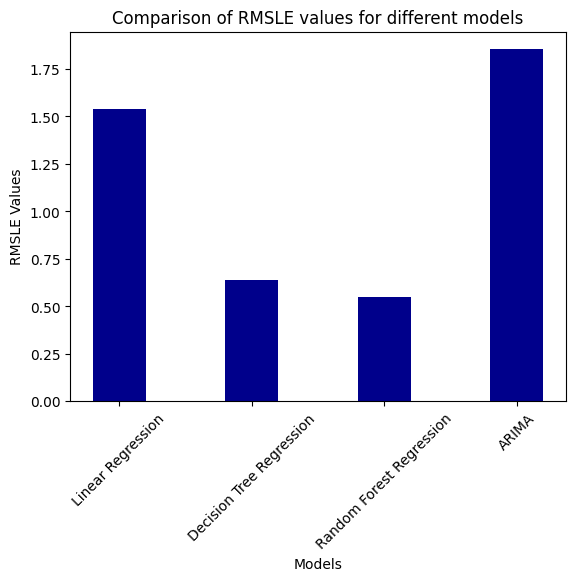

In [61]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'ARIMA']

rmsle_values = [linear_rmsle, dtr_rmsle, rfr_rmsle, arima_rmsle]

plt.bar(models, rmsle_values, color ='darkblue', width = 0.4)

plt.xlabel("Models")
plt.ylabel("RMSLE Values")
plt.title("Comparison of RMSLE values for different models")

plt.xticks(rotation=45)

plt.show()